In [51]:
import os, sys, glob, pickle, tables
import numpy as np
import matplotlib.pyplot as plt
import tables
import pandas as pd
sys.path.append('/home/amcclure/.local/lib/python3.10/site-packages')  # <-- teach jupyterhub where I installed it for myself
import simweights

In [52]:
def weighting(path):
    weighter = None
    filelist = glob.glob(path)

    for filename in filelist:
        file_obj = tables.open_file(filename, 'r')
    
        if weighter is None:
            weighter = simweights.IceTopWeighter(file_obj)
        else:
            weighter += simweights.IceTopWeighter(file_obj)
    return weighter
#define path

In [53]:
#weighted quantiles for median (takes weighted median)
def weighted_quantiles(values, weights, quantiles=0.5):
    i = np.argsort(values) #sorts values by some metric
    c = np.cumsum(weights[i]) #cumulative sum of elements along given axis
    return values[i[np.searchsorted(c, np.array(quantiles) * c[-1])]]

def weighted_percentile(data, weights, percentile):
    data = np.asarray(data)
    weights = np.asarray(weights)

    #sort data and weights by data
    sorted_indices = np.argsort(data)
    data_sorted = data[sorted_indices]
    weights_sorted = weights[sorted_indices]

    #compute cumulative sum of weights
    cumulative_weights = np.cumsum(weights_sorted)
    normalized_weights = cumulative_weights / cumulative_weights[-1] #normalize to 1

    #find where normalized cumulative weight exceeds the desired percentile
    return np.interp(percentile / 100, normalized_weights, data_sorted)

In [54]:
# Load in the SIBYLL2.1 particle sims
weighter = None

primary_energy = []
hits = []
particle_type = []
weights_type = []
reco = []
showerplanezen = []
laputopzen = []
splineweights = []

if os.path.isfile('energy.pkl'):
    with open('energy.pkl', 'rb') as file:
        primary_energy = pickle.load(file)
elif not weighter==None:
    for path in bigfilelist:
        weighter = weighting(path)

if os.path.isfile('hits.pkl'): 
    with open('hits.pkl', 'rb') as file:
        hits = pickle.load(file)
elif not weighter==None:
    for path in bigfilelist:
        weighter = weighting(path)
    
if os.path.isfile('type.pkl'):
    with open('type.pkl', 'rb') as file:
        particle_type = pickle.load(file)
elif not weighter==None:
    for path in bigfilelist:
        weighter = weighting(path)
        
if os.path.isfile('weights.pkl'):
    with open('weights.pkl', 'rb') as file:
        weights_type = pickle.load(file)
elif not weighter==None:
    for path in bigfilelist:
        weighter = weighting(path)

if os.path.isfile('reco.pkl'):
    with open('reco.pkl', 'rb') as file:
        reco = pickle.load(file)
elif not weighter==None:
    for path in bigfilelist:
        weighter = weighting(path)

if os.path.isfile('showerplanezen.pkl'):
    with open('showerplanezen.pkl', 'rb') as file:
        showerplanezen = pickle.load(file)
elif not weighter==None:
    for path in bigfilelist:
        weighter = weighting(path)

if os.path.isfile('laputopzen.pkl'):
    with open('laputopzen.pkl', 'rb') as file:
        laputopzen = pickle.load(file)
elif not weighter==None:
    for path in bigfilelist:
        weighter = weighting(path)

if os.path.isfile('splineweights.pkl'):
    with open('splineweights.pkl', 'rb') as file:
        splineweights = pickle.load(file)
elif not weighter==None:
    for path in bigfilelist:
        weighter = weighting(path)

In [56]:
df = pd.DataFrame({'nStations': hits, 'Primary Energy': primary_energy, 'weights': weights_type, 'type': particle_type, 'reco': reco, 'showerplane': showerplanezen, 'laputop': laputopzen, 'splineweights': splineweights})
#print(df)

In [25]:
#median log z (for 2012), 
#all tiers, each tier is its own graph, all particle types, H4a model, use median log (z) or mean log z, z/energy for each 
#compare to Tommy's
#log 10 (z)
protonz = 1
Hez = 2
Oz = 16
Fez = 26

log10protonz = np.log10(protonz)
log10Hez = np.log10(Hez)
log10Oz = np.log10(Oz)
log10Fez = np.log10(Fez)
#below: plotted all energy tiers with reco cut and zenith angle cuts

In [26]:
#Need zenith angle cuts (cut all events over 55 degrees)
rad55 = np.radians(55)
eV = 1e9
PeV = 1e15
zenrad = (55 * np.pi) / 180
#print(zenrad)

In [27]:
#with reco passed quality cut and showerplane and laputop zenith angle cuts
#no reco passed cut for tier 1, because reco cut fails for all tier 1 events
#tier 1
tier1_ = df[(df['nStations'] >= 3) & (df['nStations'] < 5) & (df['showerplane'] < rad55)] #& (df['reco']==1)]
tier1energy_ = tier1_['Primary Energy'].to_numpy()
weightstier1_ = tier1_['weights'].to_numpy()

#tier 1 proton
tier1p_ = df[(df['nStations'] >= 3) & (df['nStations'] < 5) & (df['type'] ==2212.0) & (df['showerplane'] < rad55)] #(df['reco']==1)}
t1penergy_ = tier1p_['Primary Energy'].to_numpy()
weightst1p_ = tier1p_['weights'].to_numpy()

#tier 1 helium
tier1h_ = df[(df['nStations'] >= 3) & (df['nStations'] < 5) & (df['type'] ==1000020040.0) & (df['showerplane'] < rad55)]
t1henergy_ = tier1h_['Primary Energy'].to_numpy()
weightst1h_ = tier1h_['weights'].to_numpy()

#tier 1 oxygen
tier1o_ = df[(df['nStations'] >= 3) & (df['nStations'] < 5) & (df['type'] ==1000080160.0) & (df['showerplane'] < rad55)]
t1oenergy_ = tier1o_['Primary Energy'].to_numpy()
weightst1o_ = tier1o_['weights'].to_numpy()

#tier 1 iron
tier1Fe_ = df[(df['nStations'] >= 3) & (df['nStations'] < 5) & (df['type'] ==1000260560.0) & (df['showerplane'] < rad55)] #(df['reco']==1)]
t1Feenergy_ = tier1Fe_['Primary Energy'].to_numpy()
weightst1Fe_ = tier1Fe_['weights'].to_numpy()

#tier 2
tier2_ = df[(df['nStations'] >= 5) & (df['nStations'] < 9) & (df['reco']==1) & (df['laputop'] < rad55)]
tier2energy_ = tier2_['Primary Energy'].to_numpy()
weightstier2_ = tier2_['weights'].to_numpy()

#tier 2 proton
tier2p_ = df[(df['nStations'] >= 5) & (df['nStations'] < 9) & (df['type'] ==2212.0) & (df['reco']==1) & (df['laputop'] < rad55)]
t2penergy_ = tier2p_['Primary Energy'].to_numpy()
weightst2p_ = tier2p_['weights'].to_numpy()

#tier 2 helium
tier2h_ = df[(df['nStations'] >= 5) & (df['nStations'] < 9) & (df['type'] ==1000020040.0) & (df['reco']==1) & (df['laputop'] < rad55)]
t2henergy_ = tier2h_['Primary Energy'].to_numpy()
weightst2h_ = tier2h_['weights'].to_numpy()

#tier 2 oxygen
tier2o_ = df[(df['nStations'] >= 5) & (df['nStations'] < 9) & (df['type'] ==1000080160.0) & (df['reco']==1) & (df['laputop'] < rad55)]
t2oenergy_ = tier2o_['Primary Energy'].to_numpy()
weightst2o_ = tier2o_['weights'].to_numpy()

#tier 2 iron
tier2Fe_ = df[(df['nStations'] >= 5) & (df['nStations'] < 9) & (df['type'] ==1000260560.0) & (df['reco']==1) & (df['laputop'] < rad55)]
t2Feenergy_ = tier2Fe_['Primary Energy'].to_numpy()
weightst2Fe_ = tier2Fe_['weights'].to_numpy()

#tier 3 
tier3_ = df[(df['nStations'] >= 9) & (df['nStations'] < 16) & (df['reco']==1) & (df['laputop'] < rad55)]
tier3energy_ = tier3_['Primary Energy'].to_numpy()
weightstier3_ = tier3_['weights'].to_numpy()

#tier 3 proton
tier3p_ = df[(df['nStations'] >= 9) & (df['nStations'] < 16) & (df['type'] ==2212.0) & (df['reco']==1) & (df['laputop'] < rad55)]
t3penergy_ = tier3p_['Primary Energy'].to_numpy()
weightst3p_ = tier3p_['weights'].to_numpy()

#tier 3 helium
tier3h_ = df[(df['nStations'] >= 9) & (df['nStations'] < 16) & (df['type'] ==1000020040.0) & (df['reco']==1) & (df['laputop'] < rad55)]
t3henergy_ = tier3h_['Primary Energy'].to_numpy()
weightst3h_ = tier3h_['weights'].to_numpy()

#tier 3 oxygen
tier3o_ = df[(df['nStations'] >= 9) & (df['nStations'] < 16) & (df['type'] ==1000080160.0) & (df['reco']==1) & (df['laputop'] < rad55)]
t3oenergy_ = tier3o_['Primary Energy'].to_numpy()
weightst3o_ = tier3o_['weights'].to_numpy()

#tier 3 iron
tier3Fe_ = df[(df['nStations'] >= 9) & (df['nStations'] < 16) & (df['type'] ==1000260560.0) & (df['reco']==1) & (df['laputop'] < rad55)]
t3Feenergy_ = tier3Fe_['Primary Energy'].to_numpy()
weightst3Fe_ = tier3Fe_['weights'].to_numpy()

#tier 4
tier4_ = df[(df['nStations'] >= 16) & (df['reco']==1) & (df['laputop'] < rad55)]
tier4energy_ = tier4_['Primary Energy'].to_numpy()
weightstier4_ = tier4_['weights'].to_numpy()

#tier 4 proton
tier4p_ = df[(df['nStations'] >= 16) & (df['type'] ==2212.0) & (df['reco']==1) & (df['laputop'] < rad55)]
t4penergy_ = tier4p_['Primary Energy'].to_numpy()
weightst4p_ = tier4p_['weights'].to_numpy()

#tier 4 helium
tier4h_ = df[(df['nStations'] >= 16) & (df['type'] ==1000020040.0) & (df['reco']==1) & (df['laputop'] < rad55)]
t4henergy_ = tier4h_['Primary Energy'].to_numpy()
weightst4h_ = tier4h_['weights'].to_numpy()

#tier 4 oxygen
tier4o_ = df[(df['nStations'] >= 16) & (df['type'] ==1000080160.0) & (df['reco']==1) & (df['laputop'] < rad55)]
t4oenergy_ = tier4o_['Primary Energy'].to_numpy()
weightst4o_ = tier4o_['weights'].to_numpy()

#tier 4 iron
tier4Fe_ = df[(df['nStations'] >= 16) & (df['type'] ==1000260560.0) & (df['reco']==1) & (df['laputop'] < rad55)]
t4Feenergy_ = tier4Fe_['Primary Energy'].to_numpy()
weightst4Fe_ = tier4Fe_['weights'].to_numpy()

In [29]:
#Apply Weighted Quantiles
t1PeV_ = round(((weighted_quantiles(tier1energy_, weightstier1_) * eV ) / PeV), 2)
t1pPeV_ =  round(((weighted_quantiles(t1penergy_, weightst1p_) * eV ) / PeV), 2)
t1hPeV_ = round(((weighted_quantiles(t1henergy_, weightst1h_) * eV ) / PeV), 2)
t1oPeV_ = round(((weighted_quantiles(t1oenergy_, weightst1o_) * eV ) / PeV), 2)
t1FePeV_ =  round(((weighted_quantiles(t1Feenergy_, weightst1Fe_) * eV ) / PeV), 2)
t2PeV_ =  round(((weighted_quantiles(tier2energy_, weightstier2_) * eV ) / PeV), 2)
t2pPeV_ = round(((weighted_quantiles(t2penergy_, weightst2p_) * eV ) / PeV), 2)
t2hPeV_ = round(((weighted_quantiles(t2henergy_, weightst2h_) * eV ) / PeV), 2)
t2oPeV_ = round(((weighted_quantiles(t2oenergy_, weightst2o_) * eV ) / PeV), 2)
t2FePeV_ =  round(((weighted_quantiles(t2Feenergy_, weightst2Fe_) * eV ) / PeV), 2)
t3PeV_ =  round(((weighted_quantiles(tier3energy_, weightstier3_) * eV ) / PeV), 2)
t3pPeV_ =  round(((weighted_quantiles(t3penergy_, weightst3p_) * eV ) / PeV), 2)
t3hPeV_ = round(((weighted_quantiles(t3henergy_, weightst3h_) * eV ) / PeV), 2)
t3oPeV_ = round(((weighted_quantiles(t3oenergy_, weightst3o_) * eV ) / PeV), 2)
t3FePeV_ =  round(((weighted_quantiles(t3Feenergy_, weightst3Fe_) * eV ) / PeV), 2)
t4PeV_ =  round(((weighted_quantiles(tier4energy_, weightstier4_) * eV ) / PeV), 2)
t4pPeV_ =  round(((weighted_quantiles(t4penergy_, weightst4p_) * eV ) / PeV), 2)
t4hPeV_ = round(((weighted_quantiles(t4henergy_, weightst4h_) * eV ) / PeV), 2)
t4oPeV_ = round(((weighted_quantiles(t4oenergy_, weightst4o_) * eV ) / PeV), 2)
t4FePeV_ =  round(((weighted_quantiles(t4Feenergy_, weightst4Fe_) * eV ) / PeV), 2)

0.3


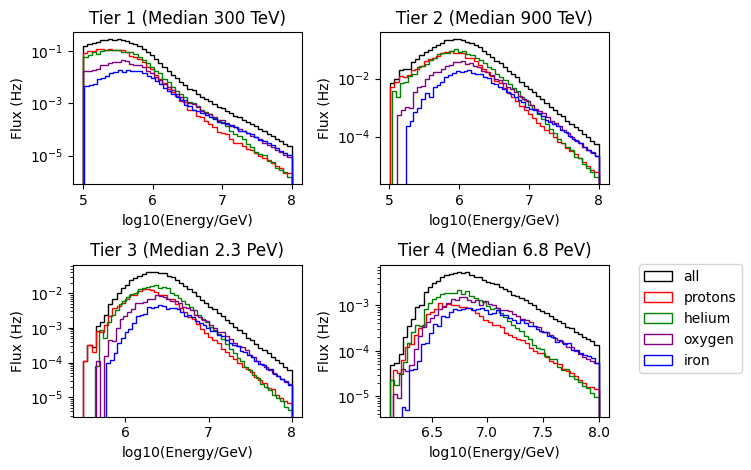

In [10]:
#all together

#tier 1
ax = plt.subplot(2, 2, 1)
plt.tight_layout()
(t1weight, binst1, patches1) =  plt.hist(np.log10(tier1energy_), bins=50, log=True, weights=weightstier1_, histtype='step', color='black', label='all')
(t1pweight, binst1p, patches2) = plt.hist(np.log10(t1penergy_), bins=50, log=True, weights=weightst1p_, histtype='step', color='red', label='protons')
(t1hweight, binst1h, patches3) = plt.hist(np.log10(t1henergy_), bins=50, log=True, weights=weightst1h_, histtype='step', color='green', label='helium')
(t1oweight, binst1o, patches4) = plt.hist(np.log10(t1oenergy_), bins=50, log=True, weights=weightst1o_, histtype='step', color='purple', label='oxygen')
(t1Feweight, binst1Fe, patches5) = plt.hist(np.log10(t1Feenergy_), bins=50, log=True, weights=weightst1Fe_, histtype='step', color='blue', label='iron')
plt.xlabel('log10(Energy/GeV)')
plt.ylabel('Flux (Hz)')
plt.title('Tier 1 (Median 300 TeV)')

#tier 2
ax = plt.subplot(2, 2, 2)
plt.tight_layout()
(t2weight, binst2, patches6) = plt.hist(np.log10(tier2energy_), bins=50, log=True, weights=weightstier2_, histtype='step', color='black', label='all')
(t2pweight, binst2p, patches7) = plt.hist(np.log10(t2penergy_), bins=50, log=True, weights=weightst2p_, histtype='step', color='red', label='protons')
(t2hweight, binst2h, patches8) = plt.hist(np.log10(t2henergy_), bins=50, log=True, weights=weightst2h_, histtype='step', color='green', label='helium')
(t2oweight, binst2o, patches9) = plt.hist(np.log10(t2oenergy_), bins=50, log=True, weights=weightst2o_, histtype='step', color='purple', label='oxygen')
(t2Feweight, binst2Fe, patches10) = plt.hist(np.log10(t2Feenergy_), bins=50, log=True, weights=weightst2Fe_, histtype='step', color='blue', label='iron')
plt.xlabel('log10(Energy/GeV)')
plt.ylabel('Flux (Hz)')
plt.title('Tier 2 (Median 900 TeV)')

#tier 3
ax = plt.subplot(2, 2, 3)
plt.tight_layout()
(t3weight, binst3, patches11) = plt.hist(np.log10(tier3energy_), bins=50, log=True, weights=weightstier3_, histtype='step', color='black', label='all')
(t3pweight, binst3p, patches12) = plt.hist(np.log10(t3penergy_), bins=50, log=True, weights=weightst3p_, histtype='step', color='red', label='protons')
(t3hweight, binst3h, patches13) = plt.hist(np.log10(t3henergy_), bins=50, log=True, weights=weightst3h_, histtype='step', color='green', label='helium')
(t3oweight, binst3o, patches14) = plt.hist(np.log10(t3oenergy_), bins=50, log=True, weights=weightst3o_, histtype='step', color='purple', label='oxygen')
(t3Feweight, binst3Fe, patches15) = plt.hist(np.log10(t3Feenergy_), bins=50, log=True, weights=weightst3Fe_, histtype='step', color='blue', label='iron')
plt.xlabel('log10(Energy/GeV)')
plt.ylabel('Flux (Hz)')
plt.title('Tier 3 (Median 2.3 PeV)')

#tier 4
ax = plt.subplot(2, 2, 4)
plt.tight_layout()
(t4weight, binst4, patches16) = plt.hist(np.log10(tier4energy_), bins=50, log=True, weights=weightstier4_, histtype='step', color='black', label='all')
(t4pweight, binst4p, patches17) = plt.hist(np.log10(t4penergy_), bins=50, log=True, weights=weightst4p_, histtype='step', color='red', label='protons')
(t4hweight, binst4h, patches18) = plt.hist(np.log10(t4henergy_), bins=50, log=True, weights=weightst4h_, histtype='step', color='green', label='helium')
(t4oweight, binst4o, patches19) = plt.hist(np.log10(t4oenergy_), bins=50, log=True, weights=weightst4o_, histtype='step', color='purple', label='oxygen')
(t4Feweight, binst4Fe, patches20) = plt.hist(np.log10(t4Feenergy_), bins=50, log=True, weights=weightst4Fe_, histtype='step', color='blue', label='iron')
plt.xlabel('log10(Energy/GeV)')
plt.ylabel('Flux (Hz)')
plt.title('Tier 4 (Median 6.8 PeV)')


ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

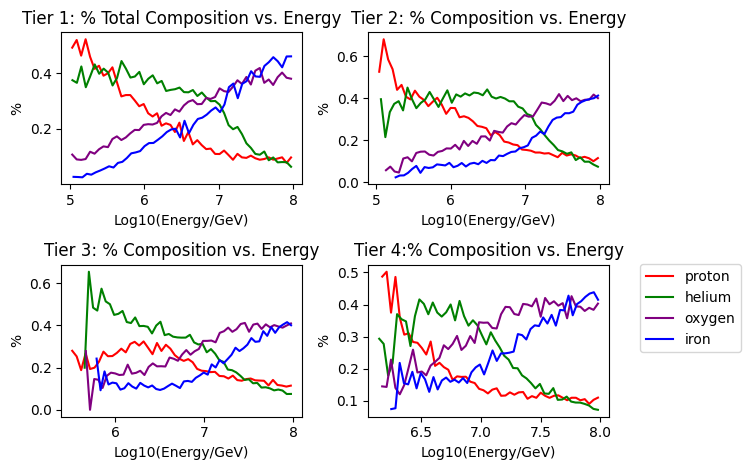

In [11]:
#percentage of total vs. log10(energy)

#tier 1 weights
weights1 = t1pweight + t1hweight + t1oweight + t1Feweight
pfrac1 = t1pweight / weights1
hfrac1 = t1hweight / weights1
ofrac1 = t1oweight / weights1
Fefrac1 = t1Feweight / weights1

#tier 2 weights
weights2 = t2pweight + t2hweight + t2oweight + t2Feweight
pfrac2 = t2pweight / weights2
hfrac2 = t2hweight / weights2
ofrac2 = t2oweight / weights2
Fefrac2 = t2Feweight / weights2

#tier 3 weights
weights3 = t3pweight + t3hweight + t3oweight + t3Feweight
pfrac3 = t3pweight / weights3
hfrac3 = t3hweight / weights3
ofrac3 = t3oweight / weights3
Fefrac3 = t3Feweight / weights3

#tier 4 weights
weights4 = t4pweight + t4hweight + t4oweight + t4Feweight 
pfrac4 = t4pweight / weights4
hfrac4 = t4hweight / weights4
ofrac4 = t4oweight / weights4
Fefrac4 = t4Feweight / weights4

#energy bins average tier 1
avrt1p = (binst1p[1:] + binst1p[:-1]) / 2
avrt1h = (binst1h[1:] + binst1h[:-1]) / 2
avrt1o = (binst1o[1:] + binst1o[:-1]) / 2
avrt1Fe = (binst1Fe[1:] + binst1Fe[:-1]) / 2

#energy bins average tier 2
avrt2p = (binst2p[1:] + binst2p[:-1]) / 2
avrt2h = (binst2h[1:] + binst2h[:-1]) / 2
avrt2o = (binst2o[1:] + binst2o[:-1]) / 2
avrt2Fe = (binst2Fe[1:] + binst2Fe[:-1]) / 2

#energy bins average tier 3
avrt3p = (binst3p[1:] + binst3p[:-1]) / 2
avrt3h = (binst3h[1:] + binst3h[:-1]) / 2
avrt3o = (binst3o[1:] + binst3o[:-1]) / 2
avrt3Fe = (binst3Fe[1:] + binst3Fe[:-1]) / 2

#energy bins to average tier 4
avrt4p = (binst4p[1:] + binst4p[:-1]) / 2
avrt4h = (binst4h[1:] + binst4h[:-1]) / 2
avrt4o = (binst4o[1:] + binst4o[:-1]) / 2
avrt4Fe = (binst4Fe[1:] + binst4Fe[:-1]) / 2

#plotting

#tier 1
ax = plt.subplot(2, 2, 1)
plt.tight_layout()
plt.plot(avrt1p, pfrac1, label='proton', color='red')
plt.plot(avrt1h, hfrac1, label='helium', color='green')
plt.plot(avrt1o, ofrac1, label='oxygen', color='purple')
plt.plot(avrt1Fe, Fefrac1, label='iron', color='blue')
plt.xlabel('Log10(Energy/GeV)')
plt.ylabel('%')
plt.title('Tier 1: % Total Composition vs. Energy')

#tier 2
ax = plt.subplot(2, 2, 2)
plt.tight_layout()
plt.plot(avrt2p, pfrac2, label='proton', color='red')
plt.plot(avrt2h, hfrac2, label='helium', color='green')
plt.plot(avrt2o, ofrac2, label='oxygen', color='purple')
plt.plot(avrt2Fe, Fefrac2, label='iron', color='blue')
plt.xlabel('Log10(Energy/GeV)')
plt.ylabel('%')
plt.title('Tier 2: % Composition vs. Energy')

#tier 3
ax = plt.subplot(2, 2, 3)
plt.tight_layout()
plt.plot(avrt3p, pfrac3, label='proton', color='red')
plt.plot(avrt3h, hfrac3, label='helium', color='green')
plt.plot(avrt3o, ofrac3, label='oxygen', color='purple')
plt.plot(avrt3Fe, Fefrac3, label='iron', color='blue')
plt.xlabel('Log10(Energy/GeV)')
plt.ylabel('%')
plt.title('Tier 3: % Composition vs. Energy')

#tier 4
ax = plt.subplot(2, 2, 4)
plt.tight_layout()
plt.plot(avrt4p, pfrac4, label='proton', color='red')
plt.plot(avrt4h, hfrac4, label='helium', color='green')
plt.plot(avrt4o, ofrac4, label='oxygen', color='purple')
plt.plot(avrt4Fe, Fefrac4, label='iron', color='blue')
plt.xlabel('Log10(Energy/GeV)')
plt.ylabel('%')
plt.title('Tier 4:% Composition vs. Energy')

plt.legend()
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()


In [12]:
#Sum_i ( log(Z_i) * fraction_i) for i = p, He, O, Fe as a function of energy
#median(log(z)) vs. median log energy --> 4 points graph
#tier 1 median(log(z))
sumtier1 = (log10protonz * pfrac1) + (log10Hez * hfrac1) + (log10Oz * ofrac1) + (log10Fez * Fefrac1)
medtier1 = np.median(sumtier1)
sumtier2 = (log10protonz * pfrac2) + (log10Hez * hfrac2) + (log10Oz * ofrac2) + (log10Fez * Fefrac2)
medtier2 = np.median(sumtier2)
sumtier3 = (log10protonz * pfrac3) + (log10Hez * hfrac3) + (log10Oz * ofrac3) + (log10Fez * Fefrac3)
medtier3 = np.median(sumtier3)
sumtier4 = (log10protonz * pfrac4) + (log10Hez * hfrac4) + (log10Oz * ofrac4) + (log10Fez * Fefrac4)
medtier4 = np.median(sumtier4)
print(f' Tier 1 Median(log(z)): {round((medtier1), 2)}' )
print(f' Tier 2 Median(log(z)): {round((medtier2), 2)}' )
print(f' Tier 3 Median(log(z)): {round((medtier3), 2)}' )
print(f' Tier 4 Median(log(z)): {round((medtier4), 2)}' )

 Tier 1 Median(log(z)): 0.71
 Tier 2 Median(log(z)): 0.56
 Tier 3 Median(log(z)): 0.65
 Tier 4 Median(log(z)): 0.82


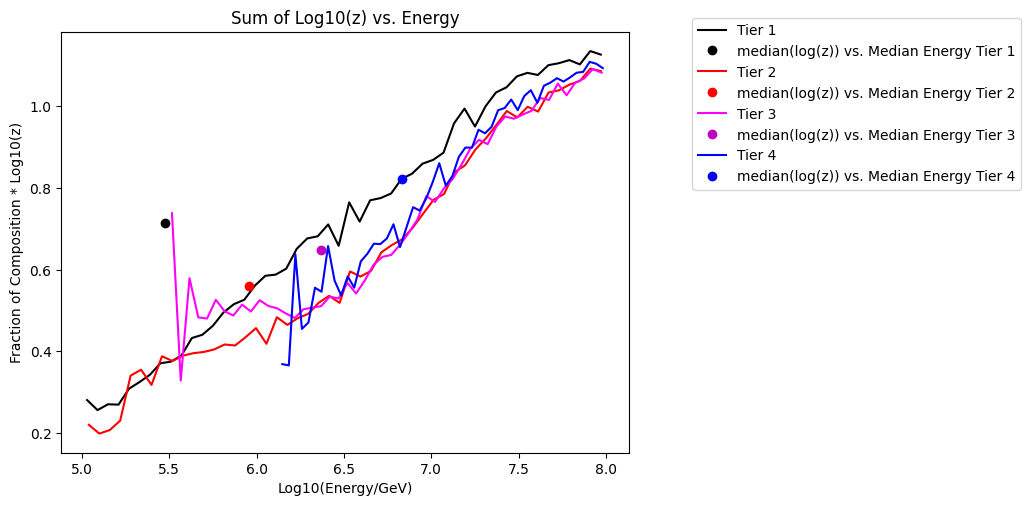

In [50]:
#sum of log z and fraction by tier vs. energy

avrt1 = (binst1[1:] + binst1[:-1]) / 2
avrt2 = (binst2[1:] + binst2[:-1]) / 2
avrt3 = (binst3[1:] + binst3[:-1]) / 2
avrt4 = (binst4[1:] + binst4[:-1]) / 2

t1GeV_ = round(weighted_quantiles(tier1energy_, weightstier1_), 2)
t2GeV_ = round(weighted_quantiles(tier2energy_, weightstier2_), 2)
t3GeV_ = round(weighted_quantiles(tier3energy_, weightstier3_), 2)
t4GeV_ = round(weighted_quantiles(tier4energy_, weightstier4_), 2)

ax = plt.subplot(1, 1, 1)
plt.tight_layout()
plt.plot(avrt1, sumtier1, color='black', label='Tier 1')
plt.plot(np.log10(t1GeV_), medtier1, 'ko', label='median(log(z)) vs. Median Energy Tier 1')
plt.plot(avrt2, sumtier2, color='red', label='Tier 2')
plt.plot(np.log10(t2GeV_), medtier2, 'ro', label='median(log(z)) vs. Median Energy Tier 2')
plt.plot(avrt3, sumtier3, color='magenta', label='Tier 3')
plt.plot(np.log10(t3GeV_), medtier3, 'mo', label='median(log(z)) vs. Median Energy Tier 3')
plt.plot(avrt4, sumtier4, color='blue', label='Tier 4')
plt.plot(np.log10(t4GeV_), medtier4, 'bo', label='median(log(z)) vs. Median Energy Tier 4')
plt.xlabel('Log10(Energy/GeV)')
plt.ylabel('Fraction of Composition * Log10(z)')
plt.title('Sum of Log10(z) vs. Energy')

plt.legend()
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()